In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
trainXY = pd.read_pickle("trainXY_2nov_linux.pkl", compression=None)

In [3]:
x = len(trainXY.columns)-3
dfX = trainXY.iloc[:, 0:x]
dfY_e = trainXY.iloc[:, x+1]
dfY_b = trainXY.iloc[:, x+2]

In [4]:
x = dfY_b
y = dfY_e
df = pd.DataFrame({'Burnup [MW/MTHM]': x, 'Enrichmnent [Weight% U235]': y}, 
                  columns=['Burnup [MW/MTHM]', 'Enrichmnent [Weight% U235]'])
#bin stuff
xbin = 1500
ybin = 0.15
xmax = np.max(np.abs(x))
ymax = np.max(np.abs(y))
xlim = (int(xmax/xbin) + 1)*xbin
ylim = (int(ymax/ybin) + 1)*ybin
xbins = np.arange(0, xlim + xbin, xbin)
ybins = np.arange(0, ylim + ybin, ybin)
xcount, xdivs = np.histogram(x, bins=xbins)
ycount, ydivs = np.histogram(y, bins=ybins)

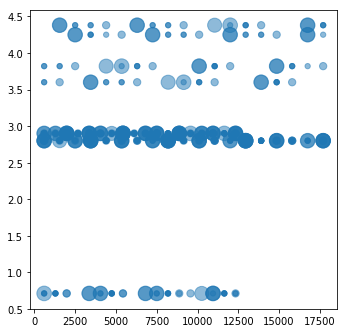

In [17]:
fig, axScatter = plt.subplots(figsize=(5.5, 5.5))
axScatter.scatter(x, y, s=ycount*0.25, alpha=0.5)
plt.show()

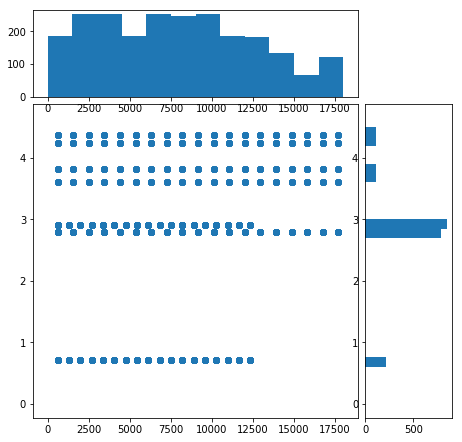

In [19]:
fig.clf()
fig, axScatter = plt.subplots(figsize=(7.5,7.5))
axScatter.scatter(x, y)
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)
axHistx.hist(x, bins=xbins)
axHisty.hist(y, bins=ybins, orientation='horizontal')
#plt.draw()
plt.show()

In [14]:
#axHistx.set_yticks([0, 50, 100])
#axHisty.set_xticks([0, 50, 100])

In [26]:
fig.clf()
fig, ax = plt.subplots(figsize=(5.5, 5.5))
scatcolor = ax.scatter(x, y, cmap='inferno')
ax.axis([0, xmax, 0, ymax])
cb = fig.colorbar(scatcolor, ax=ax)
cb.set_label('Count of Instances')

TypeError: You must first set_array for mappable